# House Pricing

## Problem Statement

We would like to predict the house of a house based on its characteristics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("house_prices.csv")
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df=df[df["TotalSF"]<6000]

In [3]:
# Data Preparation
X = df[['TotalSF']] # pandas DataFrame
y = df["SalePrice"] # pandas Series

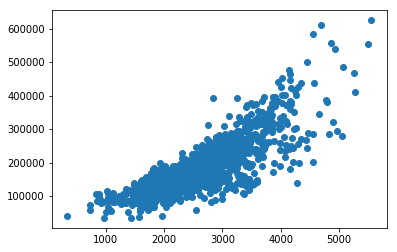

In [4]:
plt.scatter(X,y);

## Train Test Data

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10, random_state = 35)

## Linear Regression with Sklearn

In [6]:
from sklearn.linear_model import LinearRegression
linreg= LinearRegression()

In [7]:
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
linreg.intercept_

-34091.728803328355

In [9]:
linreg.coef_

array([83.96515147])

In [10]:
y_pred = linreg.predict(X_test)

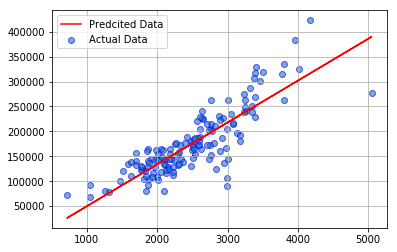

In [11]:
plt.scatter(X_test,y_test, label='Actual Data',alpha=0.6, edgecolors='b')
plt.plot(X_test,y_pred,c='r',label='Predcited Data')
plt.grid(True)
plt.legend();

## Metrics LINREG

#### MAE Mean Absolute Error

In [12]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

26375.357276881175

#### MAPE Mean Absolute Percentage Error

In [13]:
Mape = np.mean(np.abs(y_test-y_pred)/y_test)
Mape

0.1665712148893134

#### MSE Mean Squared Error

In [14]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

1258480099.459865

#### RMSE Root Mean Squared Error

In [15]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

35475.063064917376

#### R2

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7026886641381896

## K Neighbors

In [17]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=30)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

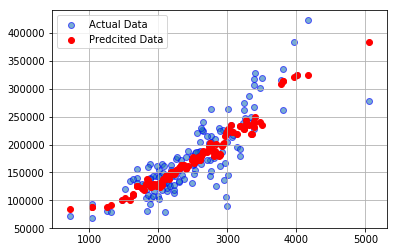

In [18]:
plt.scatter(X_test,y_test, label='Actual Data',alpha=0.6, edgecolors='b')
plt.scatter(X_test,y_pred,c='r',label='Predcited Data')
plt.grid(True)
plt.legend();

## Metrics KNN

#### MAE Mean Absolute Error

In [19]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

25875.06894977169

#### MAPE Mean Absolute Percentage Error

In [20]:
Mape = np.mean(np.abs(y_test-y_pred)/y_test)
Mape

0.15873156659908932

#### MSE Mean Squared Error

In [21]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

1269673588.6944292

#### RMSE Root Mean Squared Error

In [22]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

35632.479407058236

#### R2

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7000442431110225

### Probando diferentes k en K vecinos

In [24]:
k_range= range(1,100)
scores=[]
for k in k_range:
    from sklearn.neighbors import KNeighborsRegressor
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(np.mean(np.abs(y_test-y_pred)/y_test))
print(scores)

[0.24364542987295992, 0.20570247700695055, 0.1913671942738647, 0.18779681518722874, 0.17994101877522284, 0.178063128508928, 0.17843174986036106, 0.17224148068569645, 0.1669744003820108, 0.16323980314735778, 0.16376225145401574, 0.163337318127186, 0.16411231484230768, 0.16669878602197905, 0.16623356384648302, 0.16455287822745307, 0.16404626579785278, 0.16331904378725792, 0.16161870718317065, 0.1615522627628996, 0.16073724984083215, 0.1608385494965528, 0.16068377492159294, 0.15993945620188485, 0.16000581826324511, 0.15948767262153052, 0.15930905593255504, 0.15914734000348701, 0.15858923527676086, 0.15873156659908932, 0.15837511374874627, 0.1594121263452266, 0.16007996077047826, 0.1607134954318864, 0.1604003087268629, 0.16069743139687168, 0.16016103002658824, 0.16002375125659868, 0.159475551561411, 0.15926687470628062, 0.15943338509463964, 0.159631381844254, 0.1601942545003192, 0.1601857031061295, 0.16062428640343296, 0.16044587086465595, 0.15976874271223265, 0.1592941197828957, 0.1594761

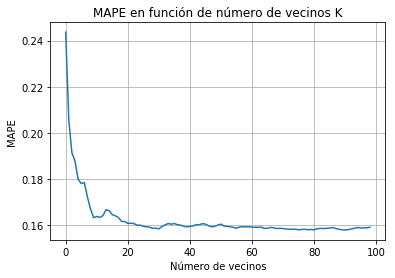

In [25]:
plt.plot(scores)
plt.grid(True)
plt.title('MAPE en función de número de vecinos K')
plt.xlabel('Número de vecinos')
plt.ylabel('MAPE');

## Cross Validation 

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
# Sobre KNeighbors
knn = KNeighborsRegressor(n_neighbors=19)
scoresknn = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_absolute_error')
scoresknn

array([-31962.68909387, -29107.96039067, -30051.80792187, -28307.2651474 ,
       -32823.10978477])

In [28]:
scoresknn.mean()

-30450.566467715682

In [29]:
# Sobre la Regresión Lineal
scoreslinreg = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_absolute_error')
scoreslinreg

array([-31590.33866136, -31060.2137948 , -30549.12490917, -29461.90971854,
       -32604.542219  ])

In [30]:
scoreslinreg.mean()

-31053.225860573915

## Grid Search CV

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
grid=GridSearchCV(KNeighborsRegressor(),
                  param_grid={'n_neighbors':range(4,100),'weights':['distance','uniform']},
                  cv=5,
                  scoring='neg_mean_absolute_error',
                  n_jobs=-1,
                  verbose=True)

In [33]:
grid.fit(X,y)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:    6.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': range(4, 100), 'weights': ['distance', 'uniform']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=True)

In [34]:
knn_final = grid.best_estimator_
knn_final

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=82, p=2,
          weights='uniform')

In [35]:
grid.best_params_

{'n_neighbors': 82, 'weights': 'uniform'}

In [36]:
grid.best_score_

-30197.346752158242

## Decision Tree Regressor

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [174]:
mean_absolute_error(y_test,y_pred)

27630.316455697826

In [172]:
# CV Sobre Decision Tree Regressor
scorestree = cross_val_score(tree, X, y, cv=6, scoring='neg_mean_absolute_error')
scorestree

array([-32606.20632986, -30263.15027761, -30042.51843487, -29701.17046179,
       -29000.0047487 , -33831.18709936])

In [173]:
scorestree.mean()

-30907.37289203302

### Metric: Correlation

In [175]:
np.corrcoef(y_pred,y_test)[0][1]

0.8088778158386329

### Customizando métricas

In [176]:
# Función de Scoring customizada
from sklearn.metrics import make_scorer
def corr(y_pred,y_test):
    return np.corrcoef(y_pred,y_test)[0][1]

In [177]:
# CV Sobre Decision Tree Regressor
scorestree = cross_val_score(tree, X, y, cv=6, scoring=make_scorer(corr))
scorestree

array([0.77884475, 0.85024792, 0.83516173, 0.79932353, 0.81217859,
       0.7604928 ])

In [178]:
scorestree.mean()

0.8060415541594491

### GridSearch CV Decision Tree

In [269]:
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(DecisionTreeRegressor(),
                  param_grid={'max_depth':range(1,10),'min_samples_leaf':range(1,50)},
                  cv=6,
                  scoring='neg_mean_absolute_error',
                  n_jobs=-1,
                  verbose=True)

In [270]:
grid.fit(X,y)

Fitting 6 folds for each of 441 candidates, totalling 2646 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 2646 out of 2646 | elapsed:    5.7s finished


GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(1, 10), 'min_samples_leaf': range(1, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=True)

In [271]:
tree_final = grid.best_estimator_
tree_final

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=40,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [272]:
grid.best_params_

{'max_depth': 4, 'min_samples_leaf': 40}

In [273]:
grid.best_score_

-30261.629251130802

### RandomizedSearch CV

In [274]:
from sklearn.model_selection import RandomizedSearchCV

In [278]:
rand = RandomizedSearchCV(DecisionTreeRegressor(),
                          param_distributions={'max_depth':range(1,10),'min_samples_leaf':range(1,50)},
                          cv=6,
                          scoring='neg_mean_absolute_error',
                          n_iter=10,
                          n_jobs=-1)
rand.fit(X,y)

RandomizedSearchCV(cv=6, error_score='raise-deprecating',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'max_depth': range(1, 10), 'min_samples_leaf': range(1, 50)},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [279]:
rand.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=33,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [280]:
rand.best_params_

{'min_samples_leaf': 33, 'max_depth': 5}

In [281]:
rand.best_score_

-30317.05005444902

### Tree Visualization

In [282]:

from sklearn.tree import export_graphviz
with open('./dtree.dot', 'w') as dotfile:
    export_graphviz(tree_final, out_file=dotfile, feature_names=['Surface'])
    dotfile.close()

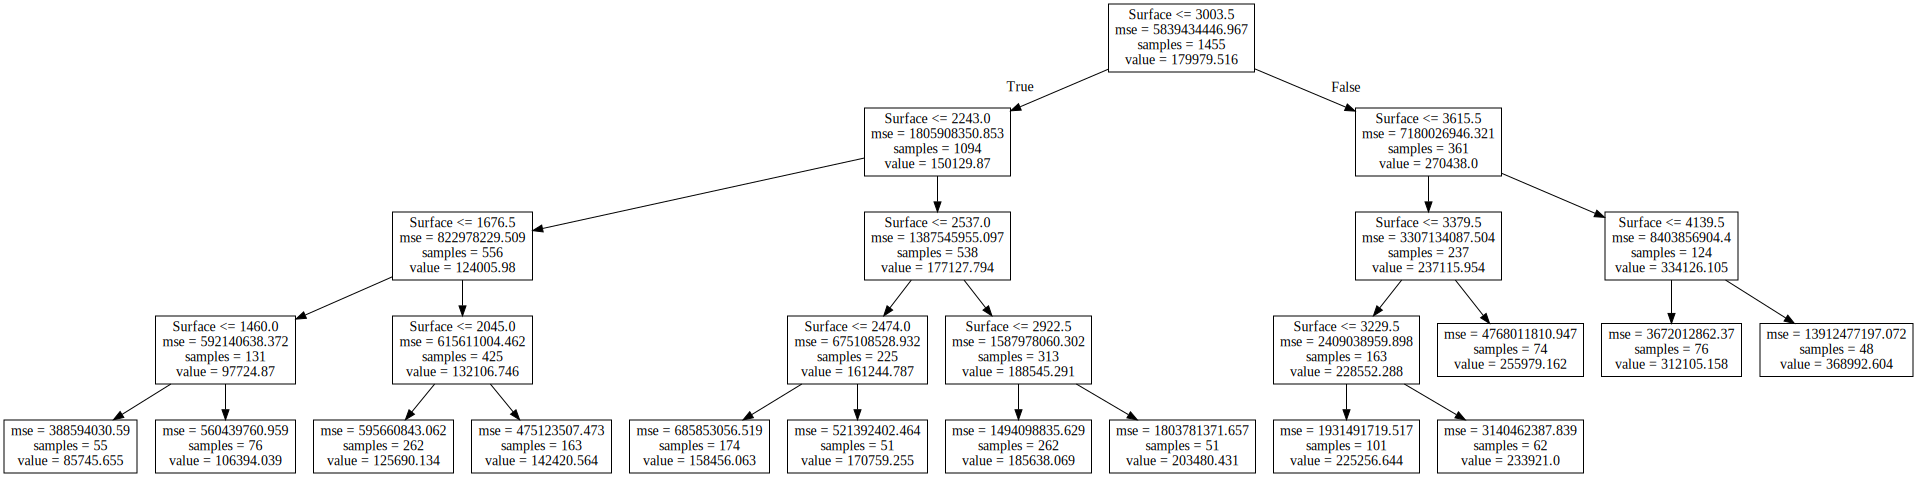

In [283]:
from graphviz import Source
file = open('dtree.dot','r')
text = file.read()
Source(text)

In [284]:
import graphviz 
dot_data = export_graphviz(tree_final, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("price") 

'price.pdf'

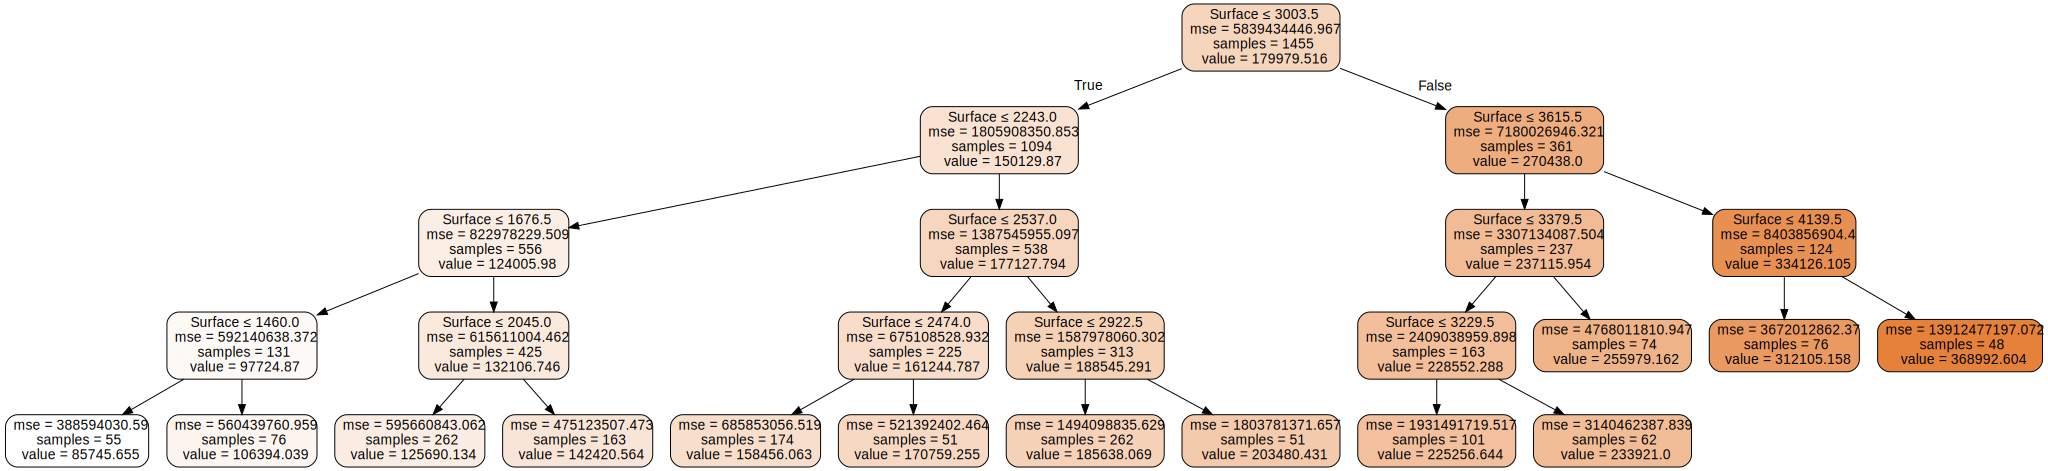

In [285]:
dot_data = export_graphviz(tree_final, out_file=None, 
                     feature_names=['Surface'],    
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [287]:
xgrid = [[i] for i in np.linspace(1000,6000,2000)]

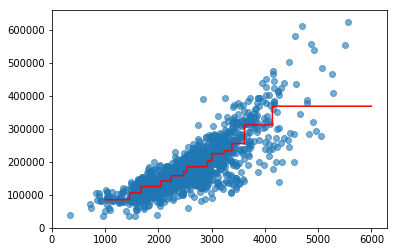

In [288]:
plt.plot(xgrid,grid.best_estimator_.predict(xgrid),color='r')
plt.scatter(X,y,alpha=0.6);